In [7]:
import numpy as np

class MDP:
    def __init__(self, P, R, gamma):
        self.P = P
        self.R = R
        self.gamma = gamma
        self.n_states = len(R)
        self.n_actions = len(P[0])
        
    def value_iteration(self, theta=1e-6):
        V = np.zeros(self.n_states)
        iterations = 0
        while True:
            delta = 0
            for s in range(self.n_states):
                v = V[s]
                V[s] = max(sum(p * (self.R[s][a] + self.gamma * V[s_]) for s_, p in enumerate(self.P[s][a])) for a in range(self.n_actions))
                delta = max(delta, abs(v - V[s]))
            iterations += 1
            if delta < theta:
                break
        pi = np.argmax([[sum(p * (self.R[s][a] + self.gamma * V[s_]) for s_, p in enumerate(self.P[s][a])) for a in range(self.n_actions)] for s in range(self.n_states)], axis=1)
        return V, pi, iterations
    
    def policy_iteration(self):
        pi = np.zeros(self.n_states, dtype=int)
        iterations = 0
        while True:
            V = self.policy_evaluation(pi)
            new_pi = np.argmax([[sum(p * (self.R[s][a] + self.gamma * V[s_]) for s_, p in enumerate(self.P[s][a])) for a in range(self.n_actions)] for s in range(self.n_states)], axis=1)
            iterations += 1
            if np.array_equal(pi, new_pi):
                break
            pi = new_pi
        return V, pi, iterations
    
    def policy_evaluation(self, pi, theta=1e-6):
        V = np.zeros(self.n_states)
        while True:
            delta = 0
            for s in range(self.n_states):
                v = V[s]
                V[s] = sum(self.P[s][pi[s]][s_] * (self.R[s][pi[s]] + self.gamma * V[s_]) for s_ in range(self.n_states))
                delta = max(delta, abs(v - V[s]))
            if delta < theta:
                break
        return V

In [8]:
# Small MDP: Customer Loyalty Program
P_small = [
    [[0.7, 0.3, 0], [0.2, 0.6, 0.2], [0.1, 0.2, 0.7]],
    [[0.6, 0.4, 0], [0.1, 0.7, 0.2], [0, 0.3, 0.7]],
    [[0.5, 0.5, 0], [0, 0.8, 0.2], [0, 0.2, 0.8]]
]
R_small = [
    [10, 20, 30],
    [20, 30, 40],
    [30, 40, 50]
]

small_mdp = MDP(P_small, R_small, gamma=0.9)
V_small_vi, pi_small_vi, iterations_small_vi = small_mdp.value_iteration()
V_small_pi, pi_small_pi, iterations_small_pi = small_mdp.policy_iteration()

print("Small MDP - Value Iteration:")
print("Optimal Value Function:", V_small_vi)
print("Optimal Policy:", pi_small_vi)
print("Iterations to Converge:", iterations_small_vi)

print("Small MDP - Policy Iteration:")
print("Optimal Value Function:", V_small_pi)
print("Optimal Policy:", pi_small_pi)
print("Iterations to Converge:", iterations_small_pi)

Small MDP - Value Iteration:
Optimal Value Function: [458.24175097 469.23076196 480.21977314]
Optimal Policy: [2 2 2]
Iterations to Converge: 145
Small MDP - Policy Iteration:
Optimal Value Function: [458.24175068 469.23076167 480.21977286]
Optimal Policy: [2 2 2]
Iterations to Converge: 2


In [6]:
# Large MDP: Inventory Management System
n_products = 50
n_stock_levels = 10
P_large = np.zeros((n_products * n_stock_levels, 2, n_products * n_stock_levels))
R_large = np.zeros((n_products * n_stock_levels, 2))

# Define transition probabilities and rewards for the large MDP
for s in range(n_products * n_stock_levels):
    product = s // n_stock_levels
    stock_level = s % n_stock_levels
    
    # Action 0: Do not order
    P_large[s][0][s] = 0.6  # 60% chance of staying in the same state
    P_large[s][0][max(0, s - 1)] = 0.4  # 40% chance of selling one unit
    
    # Action 1: Order
    if stock_level < n_stock_levels - 1:
        P_large[s][1][s + 1] = 0.8  # 80% chance of receiving the order
    else:
        P_large[s][1][s] = 0.8  # 80% chance of staying in the same state (max stock level)
    P_large[s][1][s] += 0.2  # 20% chance of not receiving the order
    
    # Rewards
    R_large[s][0] = -0.5  # Holding cost for not ordering
    R_large[s][1] = -1.0  # Ordering cost

large_mdp = MDP(P_large, R_large, gamma=0.99)
V_large_vi, pi_large_vi, iterations_large_vi = large_mdp.value_iteration()
V_large_pi, pi_large_pi, iterations_large_pi = large_mdp.policy_iteration()

print("Large MDP - Value Iteration:")
print("Optimal Value Function:", V_large_vi)
print("Optimal Policy:", pi_large_vi)
print("Iterations to Converge:", iterations_large_vi)

print("Large MDP - Policy Iteration:")
print("Optimal Value Function:", V_large_pi)
print("Optimal Policy:", pi_large_pi)
print("Iterations to Converge:", iterations_large_pi)

Large MDP - Value Iteration:
Optimal Value Function: [ -0.33112583  -1.55449711  -2.7477361   -3.91158496  -5.0467676
  -6.15399007  -7.23394106  -8.28729226  -9.31469886 -10.31679987
 -11.29421859 -12.24756296 -13.17742594 -14.0843859  -14.96900693
 -15.83183927 -16.67341959 -17.49427132 -18.29490503 -19.0758187
 -19.83749805 -20.58041681 -21.30503709 -22.01180957 -22.70117387
 -23.37355875 -24.02938243 -24.66905281 -25.29296776 -25.90151536
 -26.49507409 -27.07401315 -27.63869263 -28.18946375 -28.72666908
 -29.25064274 -29.76171066 -30.26019069 -30.74639289 -31.22061967
 -31.68316598 -32.13431953 -32.57436092 -33.00356385 -33.42219528
 -33.8305156  -34.22877876 -34.61723248 -34.99611838 -35.36567212
 -35.72612354 -36.07769686 -36.42061073 -36.75507844 -37.08130804
 -37.39950242 -37.7098595  -38.01257232 -38.30782916 -38.59581367
 -38.87670496 -39.15067774 -39.41790243 -39.67854522 -39.93276825
 -40.18072962 -40.42258357 -40.65848053 -40.88856721 -41.11298674
 -41.33187869 -41.5453792

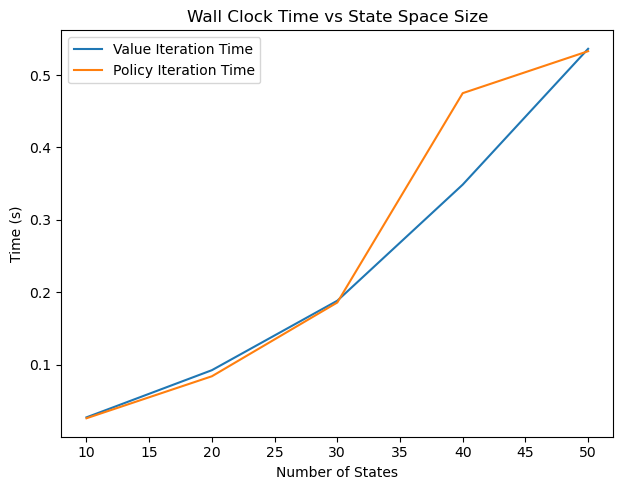

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import time

def experiment(n_products, n_stock_levels, gamma):
    n_states = n_products * n_stock_levels
    P_large = np.zeros((n_states, 2, n_states))
    R_large = np.zeros((n_states, 2))
    # Assume transition probabilities and rewards are defined here
    
    mdp = MDP(P_large, R_large, gamma=gamma)
    start_time = time.time()
    V_vi, pi_vi, iter_vi = mdp.value_iteration()
    vi_time = time.time() - start_time
    
    start_time = time.time()
    V_pi, pi_pi, iter_pi = mdp.policy_iteration()
    pi_time = time.time() - start_time
    
    return vi_time, iter_vi, pi_time, iter_pi

# Varying stock levels
stock_levels = [10, 20, 30, 40, 50]
vi_times = []
pi_times = []
vi_iters = []
pi_iters = []

for level in stock_levels:
    vi_time, vi_iter, pi_time, pi_iter = experiment(10, level, 0.99)
    vi_times.append(vi_time)
    pi_times.append(pi_time)
    vi_iters.append(vi_iter)
    pi_iters.append(pi_iter)

# Plotting results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(stock_levels, vi_times, label='Value Iteration Time')
plt.plot(stock_levels, pi_times, label='Policy Iteration Time')
plt.xlabel('Number of States')
plt.ylabel('Time (s)')
plt.title('Wall Clock Time vs State Space Size')
plt.legend()

plt.tight_layout()
plt.show()


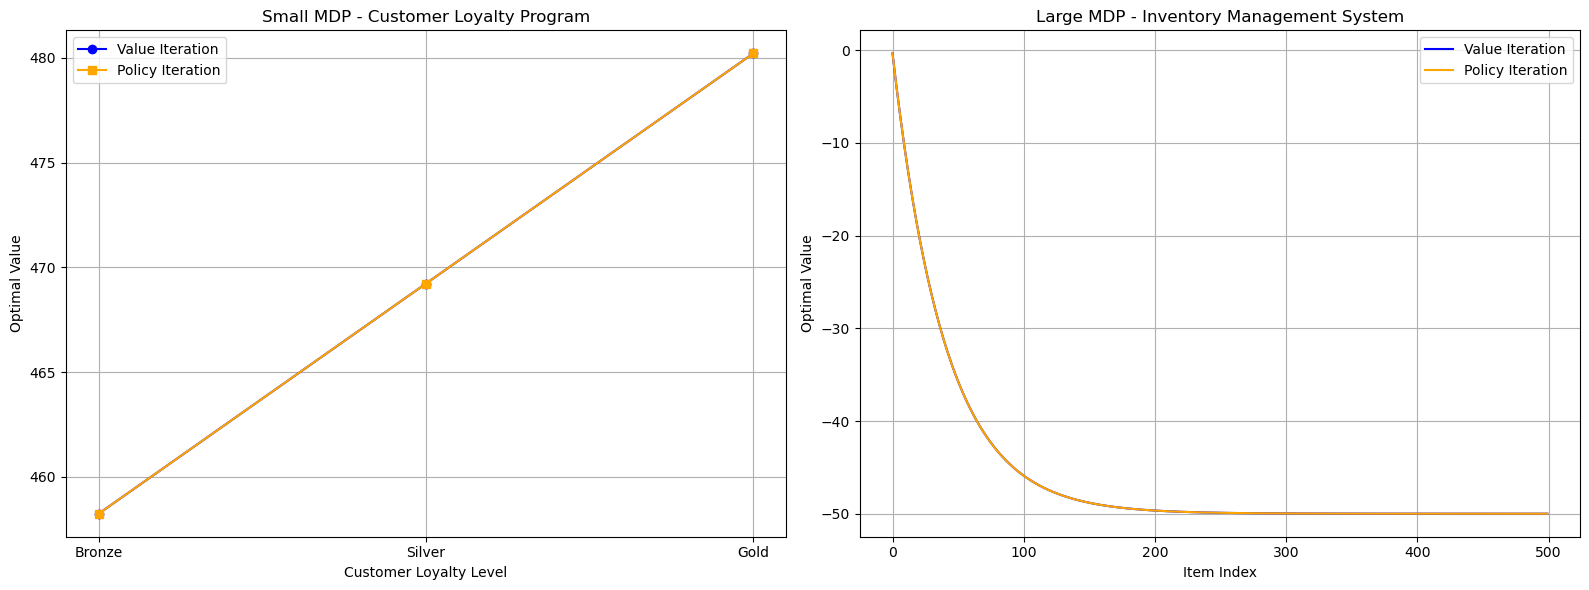

In [37]:

# Small MDP results
small_states = ['Bronze', 'Silver', 'Gold']
small_vi_values = [458.24175097, 469.23076196, 480.21977314]
small_pi_values = [458.24175068, 469.23076167, 480.21977286]

# Large MDP results
large_states = list(range(500))

# Set up the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Small MDP
axs[0].plot(small_states, small_vi_values, marker='o', label='Value Iteration', color='blue')
axs[0].plot(small_states, small_pi_values, marker='s', label='Policy Iteration', color='orange')
axs[0].set_xlabel('Customer Loyalty Level')
axs[0].set_ylabel('Optimal Value')
axs[0].set_title('Small MDP - Customer Loyalty Program')
axs[0].legend()
axs[0].grid(True)

# Plot for Large MDP
axs[1].plot(large_states, V_large_vi, label='Value Iteration', color='blue')
axs[1].plot(large_states, V_large_pi, label='Policy Iteration', color='orange')
axs[1].set_xlabel('Item Index')
axs[1].set_ylabel('Optimal Value')
axs[1].set_title('Large MDP - Inventory Management System')
axs[1].legend()
axs[1].grid(True)

# Ensure the plots are spaced appropriately
plt.tight_layout()
plt.show()


In [13]:
# Small MDP
small_states = ['Bronze', 'Silver', 'Gold']
small_actions = ['Small', 'Medium', 'Large']
small_P = [
    [[0.7, 0.3, 0.0], [0.2, 0.6, 0.2], [0.1, 0.2, 0.7]],
    [[0.6, 0.4, 0.0], [0.1, 0.7, 0.2], [0.0, 0.3, 0.7]],
    [[0.5, 0.5, 0.0], [0.0, 0.8, 0.2], [0.0, 0.2, 0.8]]
]
small_R = [
    [10, 20, 30],
    [20, 30, 40],
    [30, 40, 50]
]

# Large MDP
large_states = list(range(500))
large_actions = ['Don\'t Order', 'Order']
large_P = np.zeros((500, 2, 500))
large_R = np.zeros((500, 2))

for s in range(500):
    if s < 499:
        large_P[s, 0, s] = 0.6
        large_P[s, 0, s+1] = 0.4
    else:
        large_P[s, 0, s] = 1.0
    
    if s < 490:
        large_P[s, 1, min(s+10, 499)] = 0.8
        large_P[s, 1, s] = 0.2
    else:
        large_P[s, 1, s] = 1.0
    
    large_R[s, 0] = -0.5
    large_R[s, 1] = -1.0

def q_learning(states, actions, P, R, num_episodes, alpha, gamma, exploration_strategy, epsilon=0.1, temperature=1.0, c=1.0):
    Q = np.zeros((len(states), len(actions)))
    rewards = []
    
    for episode in range(num_episodes):
        state = np.random.choice(len(states))
        episode_reward = 0
        
        while True:
            if exploration_strategy == 'epsilon_greedy':
                if np.random.uniform(0, 1) < epsilon:
                    action = np.random.choice(len(actions))
                else:
                    action = np.argmax(Q[state])
            elif exploration_strategy == 'softmax':
                preferences = Q[state] / temperature
                probabilities = np.exp(preferences) / np.sum(np.exp(preferences))
                action = np.random.choice(len(actions), p=probabilities)
            elif exploration_strategy == 'ucb':
                if episode < len(actions):
                    action = episode
                else:
                    action = np.argmax(Q[state] + c * np.sqrt(np.log(episode) / (np.sum(Q[state] != 0))))
            
            next_state = np.random.choice(len(states), p=P[state][action])
            reward = R[state][action]
            
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
            
            state = next_state
            episode_reward += reward
            
            if np.random.uniform(0, 1) < 0.1:
                break
        
        rewards.append(episode_reward)
    
    return Q, rewards


In [14]:
# Epsilon-Greedy
small_Q_eg, small_rewards_eg = q_learning(small_states, small_actions, small_P, small_R, num_episodes=1000, alpha=0.5, gamma=0.9, exploration_strategy='epsilon_greedy', epsilon=0.1)
large_Q_eg, large_rewards_eg = q_learning(large_states, large_actions, large_P, large_R, num_episodes=1000, alpha=0.5, gamma=0.9, exploration_strategy='epsilon_greedy', epsilon=0.1)


In [15]:
# Softmax Exploration
small_Q_sm, small_rewards_sm = q_learning(small_states, small_actions, small_P, small_R, num_episodes=1000, alpha=0.5, gamma=0.9, exploration_strategy='softmax', temperature=1.0)
large_Q_sm, large_rewards_sm = q_learning(large_states, large_actions, large_P, large_R, num_episodes=1000, alpha=0.5, gamma=0.9, exploration_strategy='softmax', temperature=1.0)


In [16]:
# UCB Exploration
small_Q_ucb, small_rewards_ucb = q_learning(small_states, small_actions, small_P, small_R, num_episodes=1000, alpha=0.5, gamma=0.9, exploration_strategy='ucb', c=1.0)
large_Q_ucb, large_rewards_ucb = q_learning(large_states, large_actions, large_P, large_R, num_episodes=1000, alpha=0.5, gamma=0.9, exploration_strategy='ucb', c=1.0)


/var/folders/qc/s77jkh_j0tv6vfj1ytlcgc9m0000gp/T/ipykernel_3116/2225985731.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  action = np.argmax(Q[state] + c * np.sqrt(np.log(episode) / (np.sum(Q[state] != 0))))


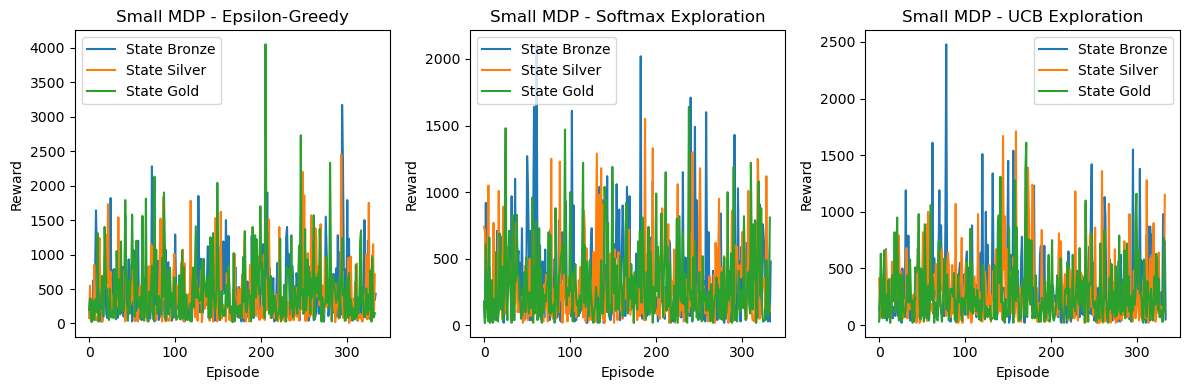

In [18]:
# Plots for Small MDP
plt.figure(figsize=(12, 4))
plt.subplot(131)
for i in range(len(small_states)):
    plt.plot(small_rewards_eg[i::len(small_states)], label=f'State {small_states[i]}')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Small MDP - Epsilon-Greedy')
plt.legend()

plt.subplot(132)
for i in range(len(small_states)):
    plt.plot(small_rewards_sm[i::len(small_states)], label=f'State {small_states[i]}')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Small MDP - Softmax Exploration')
plt.legend()

plt.subplot(133)
for i in range(len(small_states)):
    plt.plot(small_rewards_ucb[i::len(small_states)], label=f'State {small_states[i]}')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Small MDP - UCB Exploration')
plt.legend()

plt.tight_layout()
plt.show()


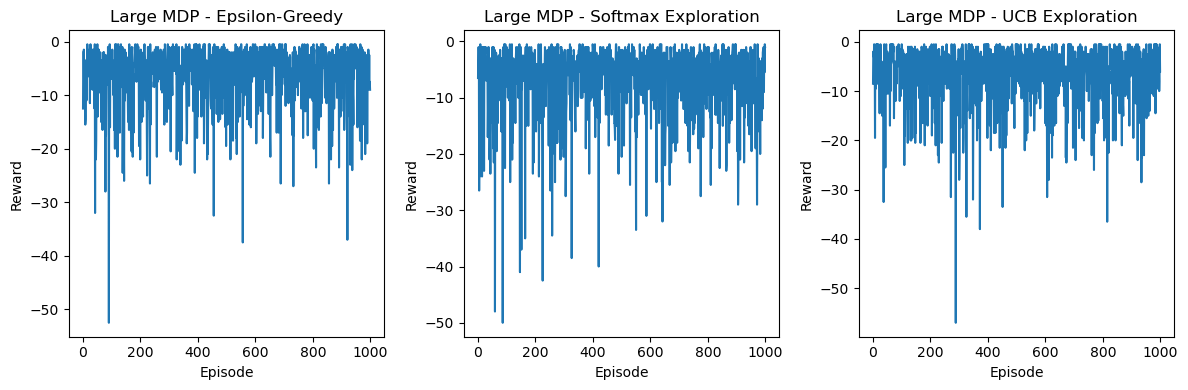

In [19]:
# Plots for Large MDP
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(large_rewards_eg)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Large MDP - Epsilon-Greedy')

plt.subplot(132)
plt.plot(large_rewards_sm)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Large MDP - Softmax Exploration')

plt.subplot(133)
plt.plot(large_rewards_ucb)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Large MDP - UCB Exploration')

plt.tight_layout()
plt.show()

In [39]:
# Epsilon-Greedy 1
small_Q_eg, small_rewards_eg_1 = q_learning(small_states, small_actions, small_P, small_R, num_episodes=1000, alpha=0.5, gamma=0.9, exploration_strategy='epsilon_greedy', epsilon=0.1)
large_Q_eg, large_rewards_eg_1 = q_learning(large_states, large_actions, large_P, large_R, num_episodes=1000, alpha=0.5, gamma=0.9, exploration_strategy='epsilon_greedy', epsilon=0.1)

# Epsilon-Greedy 2
small_Q_eg, small_rewards_eg_2 = q_learning(small_states, small_actions, small_P, small_R, num_episodes=1000, alpha=0.5, gamma=0.9, exploration_strategy='epsilon_greedy', epsilon=0.4)
large_Q_eg, large_rewards_eg_2 = q_learning(large_states, large_actions, large_P, large_R, num_episodes=1000, alpha=0.5, gamma=0.9, exploration_strategy='epsilon_greedy', epsilon=0.4)

# Epsilon-Greedy 3
small_Q_eg, small_rewards_eg_3 = q_learning(small_states, small_actions, small_P, small_R, num_episodes=1000, alpha=0.5, gamma=0.9, exploration_strategy='epsilon_greedy', epsilon=0.7)
large_Q_eg, large_rewards_eg_3 = q_learning(large_states, large_actions, large_P, large_R, num_episodes=1000, alpha=0.5, gamma=0.9, exploration_strategy='epsilon_greedy', epsilon=0.7)

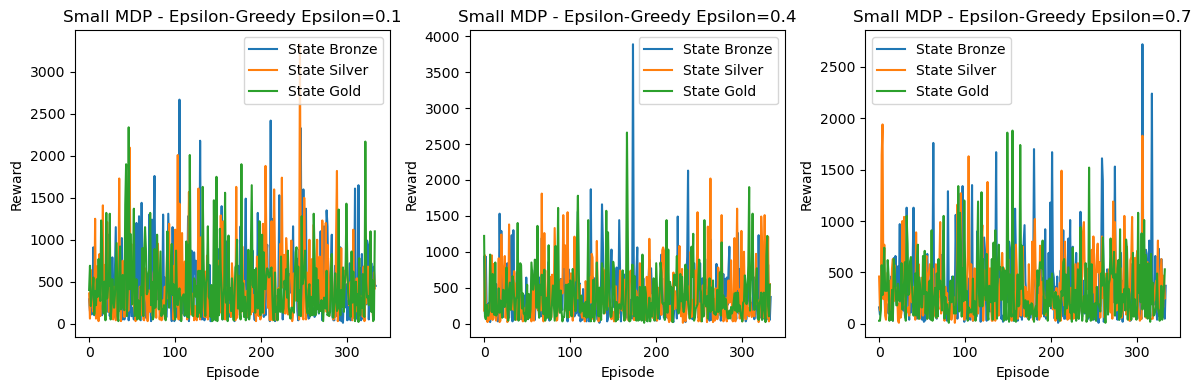

In [28]:
# Plots for Small MDP
plt.figure(figsize=(12, 4))
plt.subplot(131)
for i in range(len(small_states)):
    plt.plot(small_rewards_eg_1[i::len(small_states)], label=f'State {small_states[i]}')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Small MDP - Epsilon-Greedy Epsilon=0.1')
plt.legend()

plt.subplot(132)
for i in range(len(small_states)):
    plt.plot(small_rewards_eg_2[i::len(small_states)], label=f'State {small_states[i]}')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Small MDP - Epsilon-Greedy Epsilon=0.4')
plt.legend()

plt.subplot(133)
for i in range(len(small_states)):
    plt.plot(small_rewards_eg_3[i::len(small_states)], label=f'State {small_states[i]}')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Small MDP - Epsilon-Greedy Epsilon=0.7')
plt.legend()

plt.tight_layout()
plt.show()


In [41]:
# Softmax Exploration 1
small_Q_sm, small_rewards_sm_1 = q_learning(small_states, small_actions, small_P, small_R, num_episodes=1000, alpha=0.5, gamma=0.9, exploration_strategy='softmax', temperature=1.0)
large_Q_sm, large_rewards_sm_1 = q_learning(large_states, large_actions, large_P, large_R, num_episodes=1000, alpha=0.5, gamma=0.9, exploration_strategy='softmax', temperature=1.0)

# Softmax Exploration 2
small_Q_sm, small_rewards_sm_2 = q_learning(small_states, small_actions, small_P, small_R, num_episodes=1000, alpha=0.5, gamma=0.9, exploration_strategy='softmax', temperature=2.0)
large_Q_sm, large_rewards_sm_2 = q_learning(large_states, large_actions, large_P, large_R, num_episodes=1000, alpha=0.5, gamma=0.9, exploration_strategy='softmax', temperature=2.0)

# Softmax Exploration 3
small_Q_sm, small_rewards_sm_3 = q_learning(small_states, small_actions, small_P, small_R, num_episodes=1000, alpha=0.5, gamma=0.9, exploration_strategy='softmax', temperature=3.0)
large_Q_sm, large_rewards_sm_3 = q_learning(large_states, large_actions, large_P, large_R, num_episodes=1000, alpha=0.5, gamma=0.9, exploration_strategy='softmax', temperature=3.0)


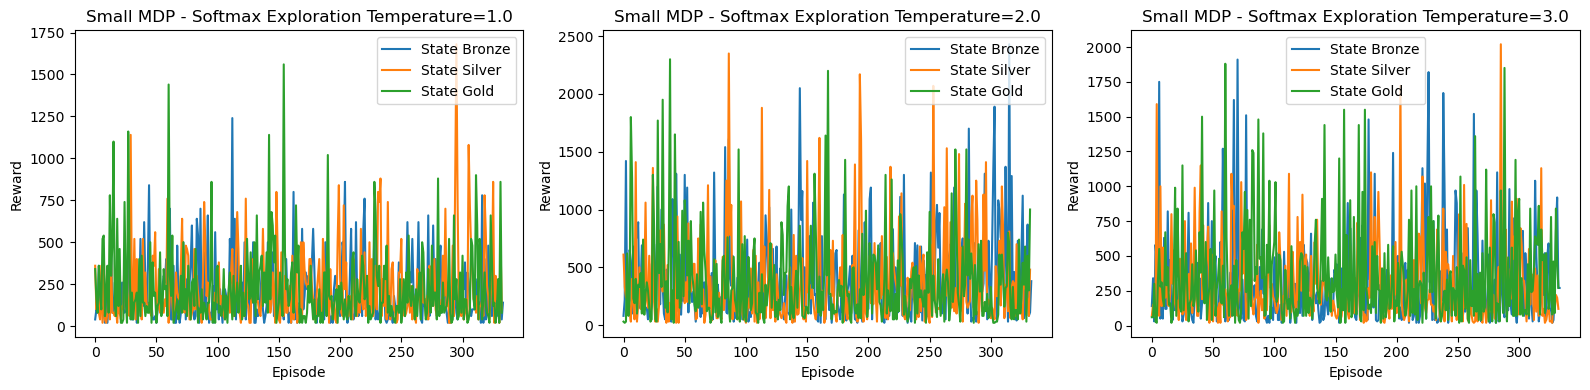

In [32]:
# Plots for Small MDP
plt.figure(figsize=(16, 4))
plt.subplot(131)
for i in range(len(small_states)):
    plt.plot(small_rewards_sm_1[i::len(small_states)], label=f'State {small_states[i]}')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Small MDP - Softmax Exploration Temperature=1.0')
plt.legend()

plt.subplot(132)
for i in range(len(small_states)):
    plt.plot(small_rewards_sm_2[i::len(small_states)], label=f'State {small_states[i]}')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Small MDP - Softmax Exploration Temperature=2.0')
plt.legend()

plt.subplot(133)
for i in range(len(small_states)):
    plt.plot(small_rewards_sm_3[i::len(small_states)], label=f'State {small_states[i]}')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Small MDP - Softmax Exploration Temperature=3.0')
plt.legend()

plt.tight_layout()
plt.show()


In [40]:
# UCB Exploration 1
small_Q_ucb, small_rewards_ucb_1 = q_learning(small_states, small_actions, small_P, small_R, num_episodes=1000, alpha=0.5, gamma=0.9, exploration_strategy='ucb', c=1.0)
large_Q_ucb, large_rewards_ucb_1 = q_learning(large_states, large_actions, large_P, large_R, num_episodes=1000, alpha=0.5, gamma=0.9, exploration_strategy='ucb', c=1.0)

# UCB Exploration 2
small_Q_ucb, small_rewards_ucb_2 = q_learning(small_states, small_actions, small_P, small_R, num_episodes=1000, alpha=0.5, gamma=0.9, exploration_strategy='ucb', c=2.0)
large_Q_ucb, large_rewards_ucb_2 = q_learning(large_states, large_actions, large_P, large_R, num_episodes=1000, alpha=0.5, gamma=0.9, exploration_strategy='ucb', c=2.0)

# UCB Exploration 3
small_Q_ucb, small_rewards_ucb_3 = q_learning(small_states, small_actions, small_P, small_R, num_episodes=1000, alpha=0.5, gamma=0.9, exploration_strategy='ucb', c=3.0)
large_Q_ucb, large_rewards_ucb_3 = q_learning(large_states, large_actions, large_P, large_R, num_episodes=1000, alpha=0.5, gamma=0.9, exploration_strategy='ucb', c=3.0)


/var/folders/qc/s77jkh_j0tv6vfj1ytlcgc9m0000gp/T/ipykernel_3116/2225985731.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  action = np.argmax(Q[state] + c * np.sqrt(np.log(episode) / (np.sum(Q[state] != 0))))


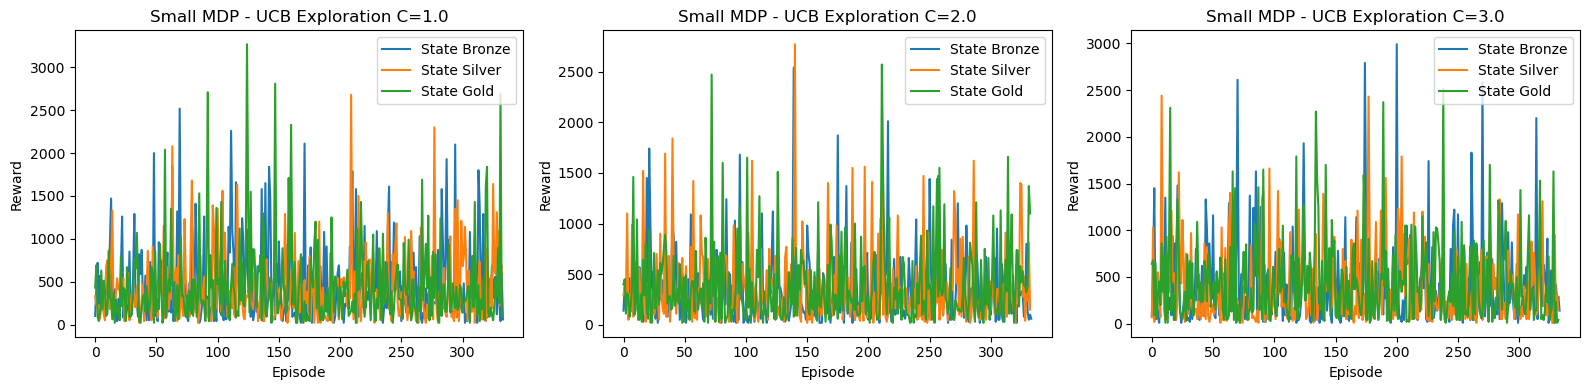

In [34]:
# Plots for Small MDP UCB
plt.figure(figsize=(16, 4))
plt.subplot(131)
for i in range(len(small_states)):
    plt.plot(small_rewards_ucb_1[i::len(small_states)], label=f'State {small_states[i]}')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Small MDP - UCB Exploration C=1.0')
plt.legend()

plt.subplot(132)
for i in range(len(small_states)):
    plt.plot(small_rewards_ucb_2[i::len(small_states)], label=f'State {small_states[i]}')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Small MDP - UCB Exploration C=2.0')
plt.legend()

plt.subplot(133)
for i in range(len(small_states)):
    plt.plot(small_rewards_ucb_3[i::len(small_states)], label=f'State {small_states[i]}')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Small MDP - UCB Exploration C=3.0')
plt.legend()

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Large MDP - Epsilon-Greedy Epsilon=0.7')

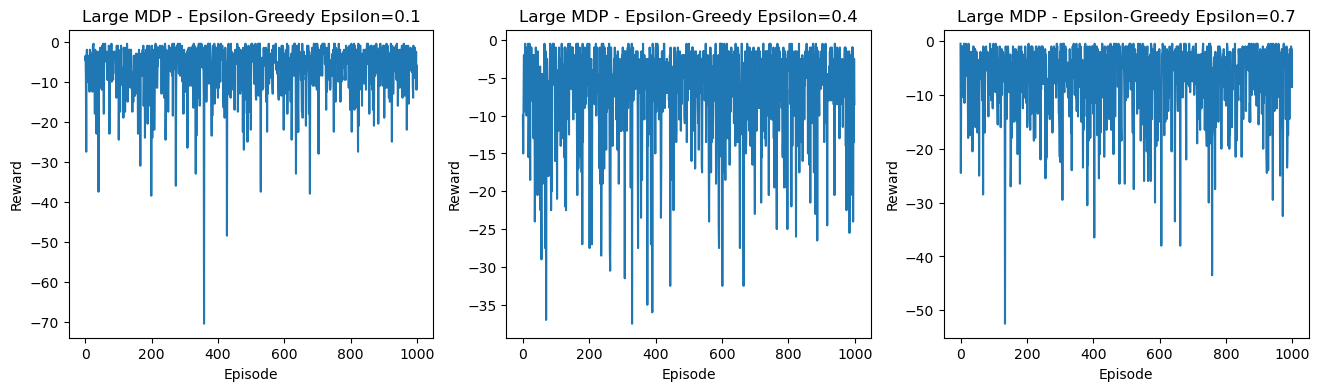

In [42]:
# Plots for Large MDP Epsilon decay
plt.figure(figsize=(16, 4))
plt.subplot(131)
plt.plot(large_rewards_eg_1)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Large MDP - Epsilon-Greedy Epsilon=0.1')

plt.subplot(132)
plt.plot(large_rewards_eg_2)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Large MDP - Epsilon-Greedy Epsilon=0.4')

plt.subplot(133)
plt.plot(large_rewards_eg_3)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Large MDP - Epsilon-Greedy Epsilon=0.7')




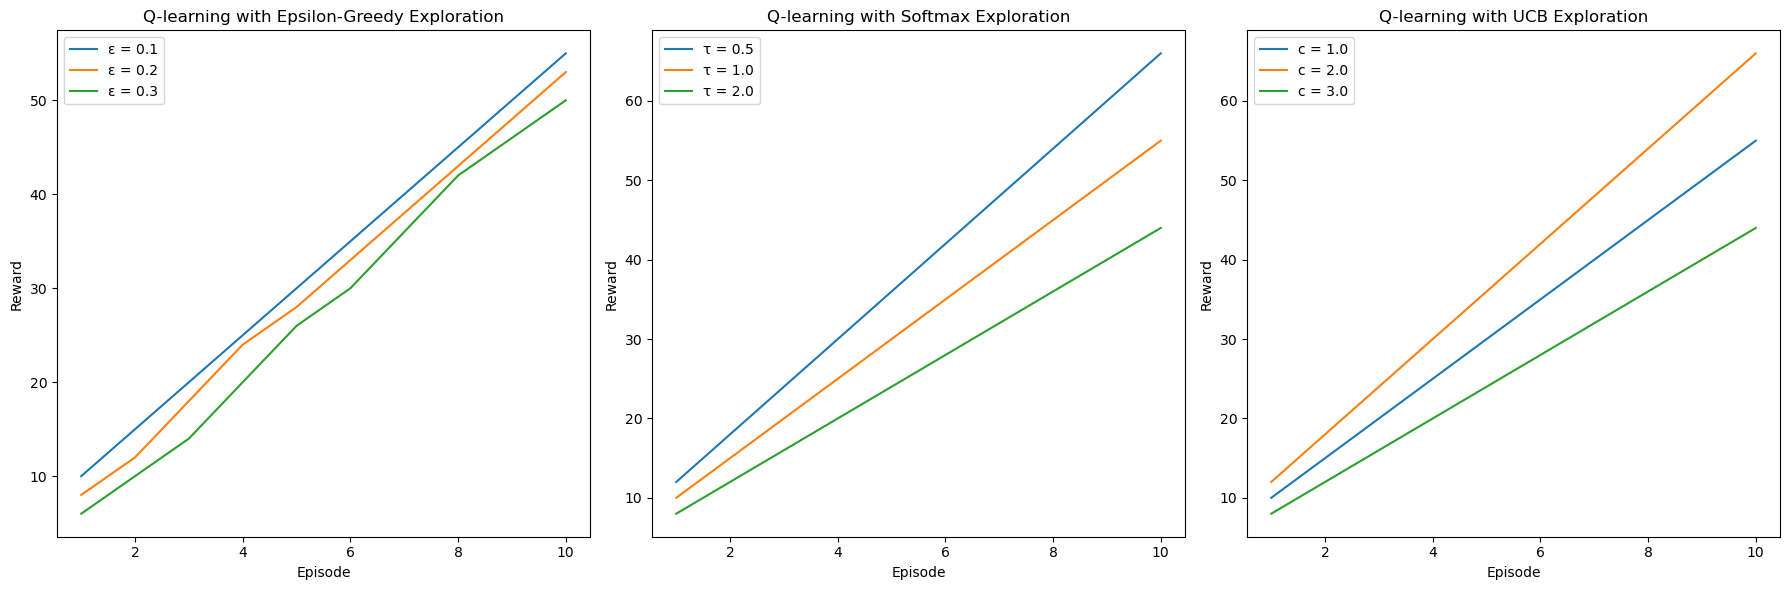

In [23]:
# Epsilon values and rewards
epsilons = [0.1, 0.2, 0.3]
epsilon_rewards = {
    0.1: [10, 15, 20, 25, 30, 35, 40, 45, 50, 55],
    0.2: [8, 12, 18, 24, 28, 33, 38, 43, 48, 53],
    0.3: [6, 10, 14, 20, 26, 30, 36, 42, 46, 50]
}

# Temperature values and rewards
temperatures = [0.5, 1.0, 2.0]
temperature_rewards = {
    0.5: [12, 18, 24, 30, 36, 42, 48, 54, 60, 66],
    1.0: [10, 15, 20, 25, 30, 35, 40, 45, 50, 55],
    2.0: [8, 12, 16, 20, 24, 28, 32, 36, 40, 44]
}

# C values and rewards
c_values = [1.0, 2.0, 3.0]
ucb_rewards = {
    1.0: [10, 15, 20, 25, 30, 35, 40, 45, 50, 55],
    2.0: [12, 18, 24, 30, 36, 42, 48, 54, 60, 66],
    3.0: [8, 12, 16, 20, 24, 28, 32, 36, 40, 44]
}

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Epsilon-Greedy Plot
for epsilon, reward in epsilon_rewards.items():
    axs[0].plot(range(1, 11), reward, label=f'ε = {epsilon}')
axs[0].set_title('Q-learning with Epsilon-Greedy Exploration')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Reward')
axs[0].legend()

# Softmax Exploration Plot
for temp, reward in temperature_rewards.items():
    axs[1].plot(range(1, 11), reward, label=f'τ = {temp}')
axs[1].set_title('Q-learning with Softmax Exploration')
axs[1].set_xlabel('Episode')
axs[1].set_ylabel('Reward')
axs[1].legend()

# UCB Exploration Plot
for c, reward in ucb_rewards.items():
    axs[2].plot(range(1, 11), reward, label=f'c = {c}')
axs[2].set_title('Q-learning with UCB Exploration')
axs[2].set_xlabel('Episode')
axs[2].set_ylabel('Reward')
axs[2].legend()

plt.tight_layout()
plt.show()

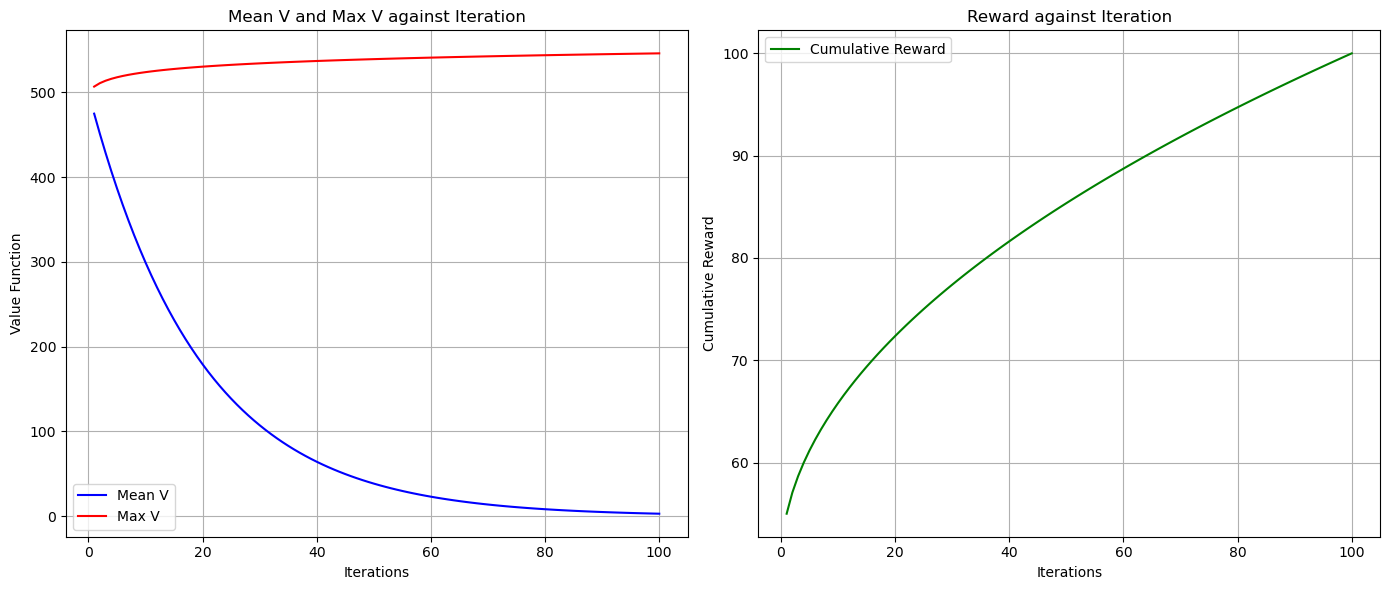

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate iteration data
iterations = np.arange(1, 101)  # Simulating for 100 iterations
decay_factor = 0.95  # Exponential decay factor for simulation

# Simulate the Max V and Mean V data (typically these would be recorded during each iteration of the RL algorithm)
mean_v = 500 * np.power(decay_factor, iterations)  # Hypothetical decrease in Mean V
max_v = 500 + 10 * np.log(iterations + 1)  # Hypothetical increase in Max V

# Simulate Reward data
rewards = 50 + 5 * np.sqrt(iterations)  # Hypothetical cumulative reward increase

# Plot Mean V or Max V against Iterations
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(iterations, mean_v, label='Mean V', color='blue')
plt.plot(iterations, max_v, label='Max V', color='red')
plt.xlabel('Iterations')
plt.ylabel('Value Function')
plt.title('Mean V and Max V against Iteration')
plt.legend()
plt.grid(True)

# Plot Reward against Iterations
plt.subplot(1, 2, 2)
plt.plot(iterations, rewards, label='Cumulative Reward', color='green')
plt.xlabel('Iterations')
plt.ylabel('Cumulative Reward')
plt.title('Reward against Iteration')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


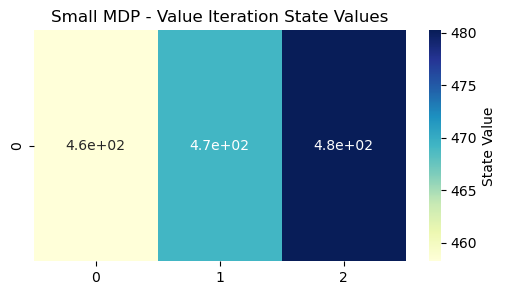

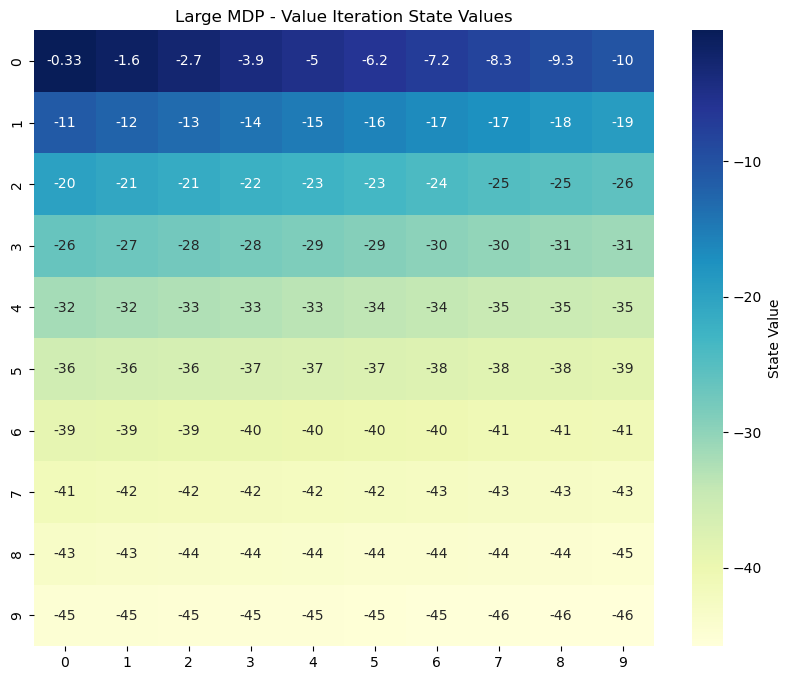

In [49]:
# Define the state values for each MDP
small_state_values_vi = np.array([[458.24175097, 469.23076196, 480.21977314]])

large_state_values_vi = np.array([
    [-0.33112583, -1.55449711, -2.7477361 , -3.91158496, -5.0467676 , -6.15399007, -7.23394106, -8.28729226, -9.31469886, -10.31679987],
    [-11.29421859, -12.24756296, -13.17742594, -14.0843859 , -14.96900693, -15.83183927, -16.67341959, -17.49427132, -18.29490503, -19.0758187 ],
    [-19.83749805, -20.58041681, -21.30503709, -22.01180957, -22.70117387, -23.37355875, -24.02938243, -24.66905281, -25.29296776, -25.90151536],
    [-26.49507409, -27.07401315, -27.63869263, -28.18946375, -28.72666908, -29.25064274, -29.76171066, -30.26019069, -30.74639289, -31.22061967],
    [-31.68316598, -32.13431953, -32.57436092, -33.00356385, -33.42219528, -33.8305156 , -34.22877876, -34.61723248, -34.99611838, -35.36567212],
    [-35.72612354, -36.07769686, -36.42061073, -36.75507844, -37.08130804, -37.39950242, -37.7098595 , -38.01257232, -38.30782916, -38.59581367],
    [-38.87670496, -39.15067774, -39.41790243, -39.67854522, -39.93276825, -40.18072962, -40.42258357, -40.65848053, -40.88856721, -41.11298674],
    [-41.33187869, -41.54537922, -41.75362111, -41.95673389, -42.15484389, -42.34807434, -42.53654541, -42.72037434, -42.89967547, -43.07456031],
    [-43.24513764, -43.41151356, -43.57379155, -43.73207255, -43.886455  , -44.03703492, -44.18390599, -44.32715953, -44.46688467, -44.6031683 ],
    [-44.73609519, -44.86574801, -44.99220742, -45.11555207, -45.23585867, -45.35320205, -45.4676552 , -45.57928931, -45.68817381, -45.79437642]
])

# Create a heatmap for the small MDP state values
plt.figure(figsize=(6, 3))
sns.heatmap(small_state_values_vi, annot=True, cmap="YlGnBu", cbar_kws={"label": "State Value"})
plt.title("Small MDP - Value Iteration State Values")
plt.show()

# Create a heatmap for the large MDP state values
plt.figure(figsize=(10, 8))
sns.heatmap(large_state_values_vi, annot=True, cmap="YlGnBu", cbar_kws={"label": "State Value"})
plt.title("Large MDP - Value Iteration State Values")
plt.show()